In [20]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

output_dir = "/media/kengoaraki/Extreme Pro/backup(master_thesis)/ActiveLearning実験結果/SSDA_MME_Saito_WSI_strage/test/MME/03_G144/"
target_data = "trg_unl-MF0003"
project = "MME_valt3_MF0012toMF0003_03_G144_all"

# classes = [0, 1, 2]
classes = ["Non-\nNeop.", "HSIL", "LSIL"]
save = True
dpi = 300
rotation = 0

cm0 = np.array(
    [[55012., 2793., 3499.],
    [ 1398., 5673., 1179.],
    [  252.,  192.,  402.]]
)

cm1 = np.array(
    [[50885., 6410., 4010.],
    [  523., 6943.,  782.],
    [  209.,  194.,  444.]]
)

cm2 = np.array(
    [[52113., 3111., 6079.],
    [  986., 4680., 2584.],
    [  142.,  109.,  596.]]
)

cm3 = np.array(
    [[53029., 6694., 1581.],
    [  560., 7446.,  243.],
    [  224.,  372.,  251.]]
)

cm4 = np.array(
    [[55464., 3902., 1938.],
    [  956., 6866.,  427.],
    [  309.,  243.,  295.]]
)

cm = cm0 + cm1 + cm2 + cm3 + cm4

In [21]:
# 合計後の各評価指標
import os
import sys
from pathlib import Path
sys.path.append(os.path.join(Path().resolve(), ".."))

from S.eval import eval_metrics

print(f"\n cm ({target_data}):\n{np.array2string(cm, separator=',')}\n")

met = eval_metrics(cm)
print(f"accuracy:  {met['accuracy']:.5f}")
print(f"precision: {met['precision']:.5f}")
print(f"recall:    {met['recall']:.5f}")
print(f"f1:        {met['f1']:.5f}")
print(f"mIoU:      {met['mIoU']:.5f}")


 cm (trg_unl-MF0003):
[[266503., 22910., 17107.],
 [  4423., 31608.,  5215.],
 [  1136.,  1110.,  1988.]]

accuracy:  0.85255
precision: 0.54318
recall:    0.70177
f1:        0.61238
mIoU:      0.47104


In [22]:
# 軸入れ替え
cm = cm[:, [0, 2, 1]]
cm = cm[[0, 2, 1], :]
classes = ["Non-\nNeop.", "LSIL", "HSIL"]

In [23]:
def plot_confusion_matrix(cm, class_names, normalize=True, font_size=25, rotation=0):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.

    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    https://towardsdatascience.com/exploring-confusion-matrix-evolution-on-tensorboard-e66b39f4ac12
    """

    figure = plt.figure(figsize=(8, 8))
    plt.rcParams["font.size"] = font_size

    # Normalize the confusion matrix.
    if normalize:
        cm = np.around(cm.astype("float") / cm.sum(axis=1)[:, np.newaxis], decimals=2)
        plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues, vmin=0, vmax=1)
    else:
        plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    # plt.title("Confusion matrix")
    # plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=rotation)
    plt.yticks(tick_marks, class_names)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.0

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    return figure

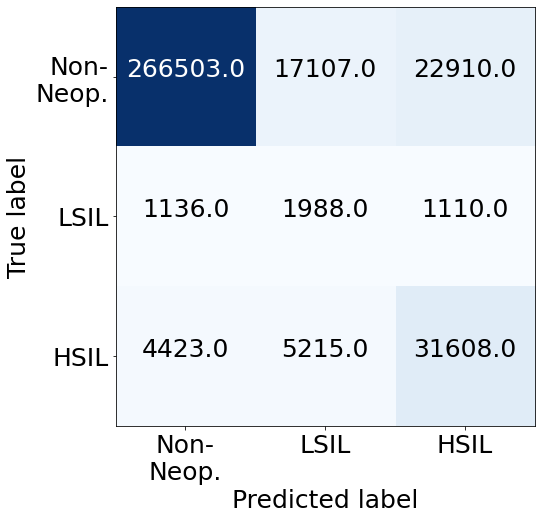

In [24]:
# Not-Normalized
cm_plt = plot_confusion_matrix(
    cm, classes, normalize=False, font_size=25, rotation=rotation)
if save:
    cm_plt.savefig(
        output_dir
        + project
        + "_"
        + target_data
        + "_nn-confmatrix.png",
        dpi=dpi
    )
# plt.clf()
# plt.close()

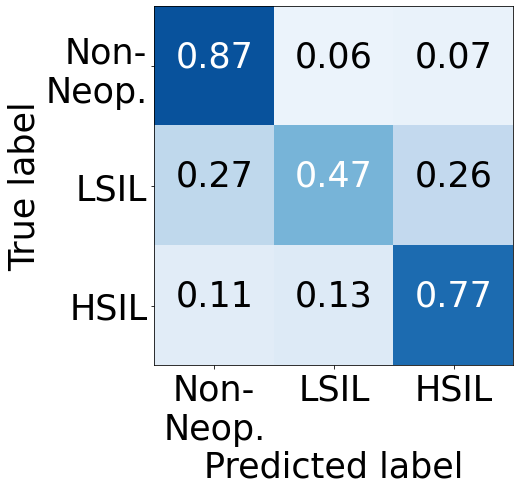

In [25]:
# Normalized
cm_plt = plot_confusion_matrix(
    cm, classes, normalize=True, font_size=35, rotation=rotation)
if save:
    cm_plt.savefig(
        output_dir
        + project
        + "_"
        + target_data
        + "_confmatrix.png",
        dpi=dpi
    )
# plt.clf()
# plt.close()